In [97]:
import pandas as pd
from tkinter import filedialog
from summarytools import dfSummary
import matplotlib.pyplot as plt
import numpy as np

File path

In [98]:
# Display the dialog for browsing files
filename = filedialog.askopenfilename()

# Print the selected file path.
print(filename)

/Users/andrepirex/Downloads/vehicles.csv


Create a dataframe of the CVS file

In [99]:
dataset_original=pd.read_csv(filename)

Start the Descriptive analysis

Size of the Dataset - display the number of observations and attributes

In [100]:
dataset_original.shape

(426880, 26)

Head of dataset - display the first 5 rows of the dataset

In [101]:
dataset_original.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


Type of the attributes - display the categories of data for each feature

In [102]:
dataset_original.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

Localization Measures - display the some statistical measures for numerical attributes

In [103]:
dataset_original.describe().map(lambda x: f"{x:0.1f}") #round the decimals up to 1 decimal 

,id,price,year,odometer,county,lat,long
count,426880.0,426880.0,425675.0,422480.0,0.0,420331.0,420331.0
mean,7311486634.2,75199.0,2011.2,98043.3,nan,38.5,-94.7
std,4473170.4,12182282.2,9.5,213881.5,nan,5.8,18.4
min,7207408119.0,0.0,1900.0,0.0,nan,-84.1,-159.8
25%,7308143339.2,5900.0,2008.0,37704.0,nan,34.6,-111.9
50%,7312620821.0,13950.0,2013.0,85548.0,nan,39.2,-88.4
75%,7315253543.5,26485.8,2017.0,133542.5,nan,42.4,-80.8
max,7317101084.0,3736928711.0,2022.0,10000000.0,nan,82.4,173.9


Exploratory Data Analysis (EDA) with summarytools library -  display to frequency of the values in the dataset, number of missing values, plot data, and other statistics

In [104]:
dfSummary(dataset_original)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id[int64],Mean (sd) : 7311486634.2 (4473170.4)min < med < max:7207408119.0 < 7312620821.0 < 7317101084.0IQR (CV) : 7110204.2 (1634.5),"426,880 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB00lEQVR4nO3ZTWrCUBiF4e+2Nk0c3EsIZBPdQRbhYruEDlyBO3AmSIj4E6omHZSWdmBrQqye8j7TcPAbvAghrm1bA27d3bUPAM4xuvYB+D+cc4mZRT3nr23b7k49JFQMwjmXZFk28d6nffar1ap0zj2fipVQMZTIe58WRbELIdRdhlVVxdPpNF0ul5GZESouL4RQ53m+7TFNfnrIyxQkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokjK59AG6Hcy4xs6jn3DdN8zDkPV8RKszsPdIsyybe+7TPfr/fx8fj8amu6xcz2w58HqHiU+S9T4ui2IUQ6q7j+Xyezmaz8eFwuL/EcYSKb0IIdZ7nnf8Ry7JMLnHPB16mIIFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIeHXL1POudjMHv/gFlyXb5pmVFVV3Ge8Xq9jM7PNZhMvFotxl+05v/kGkAVQzk4i7JcAAAAASUVORK5CYII="">",0(0.0%)
2,url[object],1. https://wyoming.craigslist.org2. https://wyoming.craigslist.org3. https://wyoming.craigslist.org4. https://wyoming.craigslist.org5. https://wyoming.craigslist.org6. https://wyoming.craigslist.org7. https://wyoming.craigslist.org8. https://wyoming.craigslist.org9. https://wyoming.craigslist.org10. https://wyoming.craigslist.org11. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)426,870 (100.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
3,region[object],1. columbus2. jacksonville3. spokane / coeur d'alene4. eugene5. fresno / madera6. orlando7. omaha / council bluffs8. bend9. new hampshire10. kennewick-pasco-richland11. other,"3,608 (0.8%)3,562 (0.8%)2,988 (0.7%)2,985 (0.7%)2,983 (0.7%)2,983 (0.7%)2,982 (0.7%)2,982 (0.7%)2,981 (0.7%)2,981 (0.7%)395,845 (92.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADe0lEQVR4nO3cMW4aUQBF0Y+FrLgZhJBYDIvwYrMIdoMQU8SWG1IE14FEvijknCpFiimuhsnXf1mcz+cBhad7PwD/D7GRERsZsZERGxmxkREbGbGRERuZxRjjZYwxzufz252fhQe33Gw2r2OMsVgsvguOr/Q0TdN6mqb1GOP53g/DY/PNRkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxklvM8Hy9//rjrk/DwbBDILPyXWVS82chYV5GxriLj6IOM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxnXwskYvJDxZiNj8ELG4IWMow8yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2RcCydj8ELGNxsZP6NkrKvIWFeR8c1GRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbGuoqMa+FkrKvIeLORMXghY/BCxtEHGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyroWTMXgh481GxuCFjMELGUcfZMR

Normalize Data

In [105]:
dataset_original['manufacturer']=dataset_original['manufacturer'].str.lower()
dataset_original['model']=dataset_original['model'].str.lower()
dataset_original['type']=dataset_original['type'].str.lower()

Replace Missing values

'type' attribute
Goal: create a table with the most commom type of each manufacturer and model

In [106]:
Type_Table=dataset_original[['manufacturer','model', 'type']].dropna().reset_index(drop=True)
Type_Table['MostCommon']=Type_Table.groupby(['manufacturer','model']).cumcount()+1
Type_Table=Type_Table.sort_values(by='MostCommon',ascending=False).reset_index(drop=True)
Type_Table=Type_Table.drop_duplicates(['manufacturer','model']).reset_index(drop=True).drop(['MostCommon'], axis=1)
Type_Table['UniqueReference']=Type_Table['manufacturer'] + Type_Table['model']
Type_Table=Type_Table.drop(['manufacturer','model'],axis=1)
Type_Table

,type,UniqueReference
0,pickup,fordf-150
1,truck,chevroletsilverado 1500
2,pickup,ram1500
3,sedan,toyotacamry
4,sedan,hondaaccord
...,...,...
20966,coupe,lincolnmark iii
20967,coupe,mazdarx& gls sport
20968,wagon,bmw328d xdrive
20969,truck,ram1500 laramie 4dr cre


Detect the duplicates

Count the number of duplicate rows

In [107]:
Number_of_Duplicates = len(dataset_original)-len(dataset_original.drop_duplicates())
print(Number_of_Duplicates)

0


###### There are no duplicates entries, however the same car may be listed in multiple websites because the owners listed it for sell in different states or regions. These situations are easielly identified by counting the VIN of the vehicle.  For example VIN "1FMJU1JT1HEA52352", is counted more than one time, so the car is posted in multiple adds in different states or regions.

Count number of duplicated cars by VIN

In [108]:
#group by VIN and show the frequency
dataset_original['VIN'].value_counts()

VIN
1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
                    ... 
3C4NJDBB3JT270398      1
1D8GU58K47W559713      1
ZACNJBC11KPK29171      1
3C4NJDBB1JT116952      1
5XXGN4A73FG370482      1
Name: count, Length: 118264, dtype: int64

Rules to solve duplicates

In [109]:
dataset_modified=dataset_original.groupby('VIN').aggregate({'year':  lambda x: round(x.median(),0), 'manufacturer': lambda x: ' & '.join(list(set(x.astype(str)))), 'model': lambda x: ' & '.join(list(set(x.astype(str))))})
dataset_modified=dataset_modified.reset_index(level=['VIN'])
dataset_modified['UniqueReference']=dataset_modified['manufacturer'] + dataset_modified['model']
dataset_modified

,VIN,year,manufacturer,model,UniqueReference
0,000,1967.0,nan,1967 mg midget,nan1967 mg midget
1,0000,1966.0,nan,plymouth barracuda,nanplymouth barracuda
2,00000,1900.0,nan,all,nanall
3,000000,1957.0,nan,willys wagon,nanwillys wagon
4,0000000,1900.0,nan,all,nanall
...,...,...,...,...,...
118259,ZN661YUA4LX344692,2020.0,nan,maserati levante,nanmaserati levante
118260,ZN661YUL1HX236166,2017.0,nan,maserati levante,nanmaserati levante
118261,ZN661YUL3HX198178,2017.0,nan,maserati levante,nanmaserati levante
118262,ZN661YUS0HX263351,2017.0,nan,maserati levante s,nanmaserati levante s


New Dataframe

In [110]:
dataset_modified=dataset_modified.merge(Type_Table, how='right', on='UniqueReference').dropna()

DataFrame in use for the visualizations

In [111]:
#Filter the dataframe for the last 10 years (2014-2024)
pivot_df=dataset_modified[(dataset_modified['year']>=2004) & (dataset_modified['year']<=2024)]
pivot_df=pivot_df[['VIN','type','year']].groupby(['type','year']).count().reset_index(level=['type','year'])
pivot_df['Frequency']=pivot_df['VIN']
pivot_df=pivot_df.drop('VIN', axis=1)
pivot_df

,type,year,Frequency
0,bus,2004.0,2
1,bus,2005.0,4
2,bus,2006.0,7
3,bus,2007.0,3
4,bus,2008.0,2
...,...,...,...
228,wagon,2017.0,345
229,wagon,2018.0,405
230,wagon,2019.0,235
231,wagon,2020.0,148


Question 1

Comparison visualization - Circular Area chart

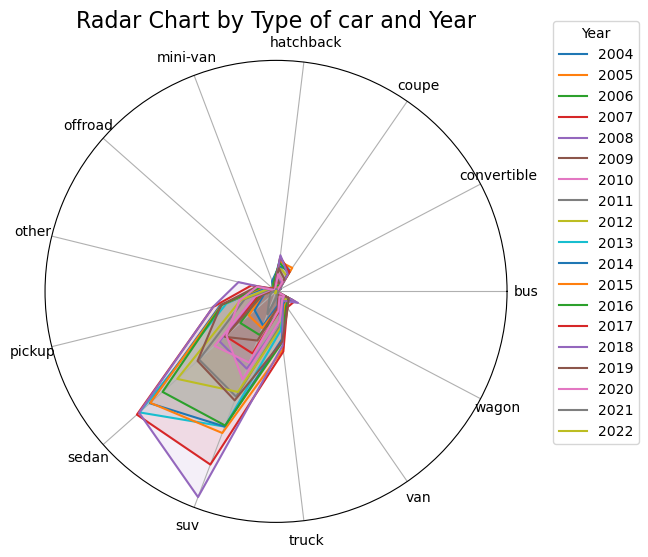

In [112]:
# Pivot the data to get frequencies for each "type" and "year"
pivot_table = pivot_df.pivot(index="type", columns="year", values="Frequency").fillna(0)

# Prepare data for radar chart
categories = pivot_table.index  # Types of cars
years = pivot_table.columns.astype(int)  # Convert years to integers
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Close the circle

# Create radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot one line per year
for year in years:
    values = pivot_table[year].tolist()
    values += values[:1]  # Close the circular plot
    ax.plot(angles, values, label=str(year))
    ax.fill(angles, values, alpha=0.1)

# Add type labels as radial ticks
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Customize chart appearance
ax.set_yticks([])  # Hide radial ticks
ax.set_title("Radar Chart by Type of car and Year", size=16)
ax.legend(title='Year', loc="upper right", bbox_to_anchor=(1.3, 1.1))

plt.show()


Distribution visualization - Scatter chart

/var/folders/zh/vbl6k4hs1ggfwjfqn6t_gb100000gn/T/ipykernel_1122/4204677166.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['year'] = subset['year'].astype(str).str[:-2]
/var/folders/zh/vbl6k4hs1ggfwjfqn6t_gb100000gn/T/ipykernel_1122/4204677166.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['year'] = subset['year'].astype(str).str[:-2]
/var/folders/zh/vbl6k4hs1ggfwjfqn6t_gb100000gn/T/ipykernel_1122/4204677166.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

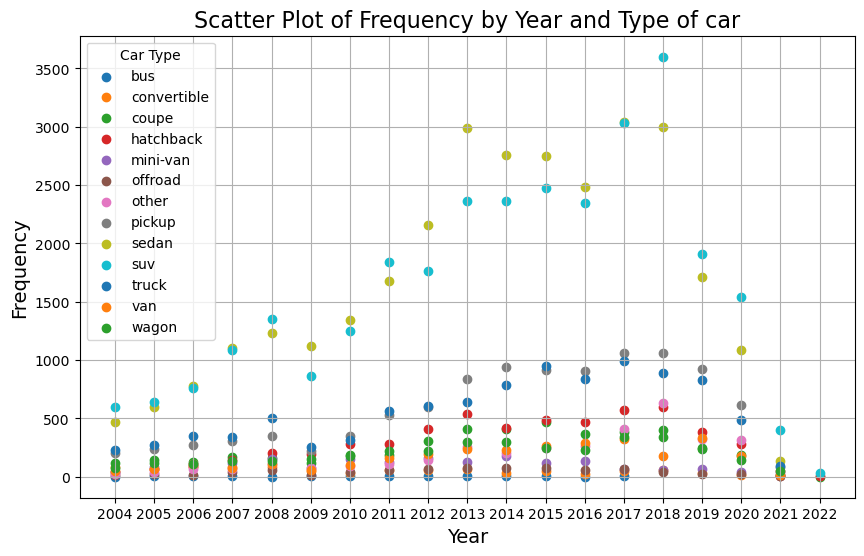

In [113]:
# Create a scatter plot
plt.figure(figsize=(10, 6))



# Plot each type as a unique color
for car_type in pivot_df['type'].unique():
    subset = pivot_df[pivot_df['type'] == car_type]
    subset['year'] = subset['year'].astype(str).str[:-2]
    plt.scatter((subset['year']), subset['Frequency'], label=car_type)

# Customize the plot
plt.title("Scatter Plot of Frequency by Year and Type of car", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(title="Car Type")
plt.grid(True)

# Show the plot
plt.show()


Composition visualization - Stacked 100% column chart

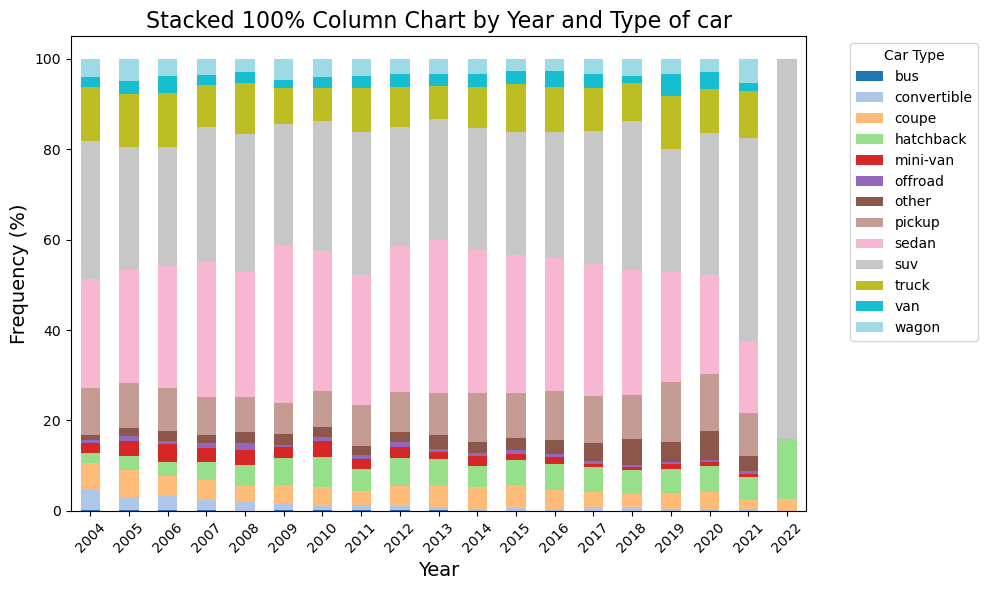

In [114]:
# Pivot the data to get frequencies for each "type" and "year"
pivot_table2 = pivot_df.pivot(index="year", columns="type", values="Frequency")

# Convert year to integers (if they were floats)
pivot_table2.index = pivot_table2.index.astype(int)


# Normalize the data for a 100% stacked chart
normalized_data = pivot_table2.div(pivot_table2.sum(axis=1), axis=0) * 100

# Plot the stacked 100% column chart
normalized_data.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="tab20")

# Customize the plot
plt.title("Stacked 100% Column Chart by Year and Type of car", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Frequency (%)", fontsize=14)
plt.legend(title="Car Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Relationship visualization - Bubble chart

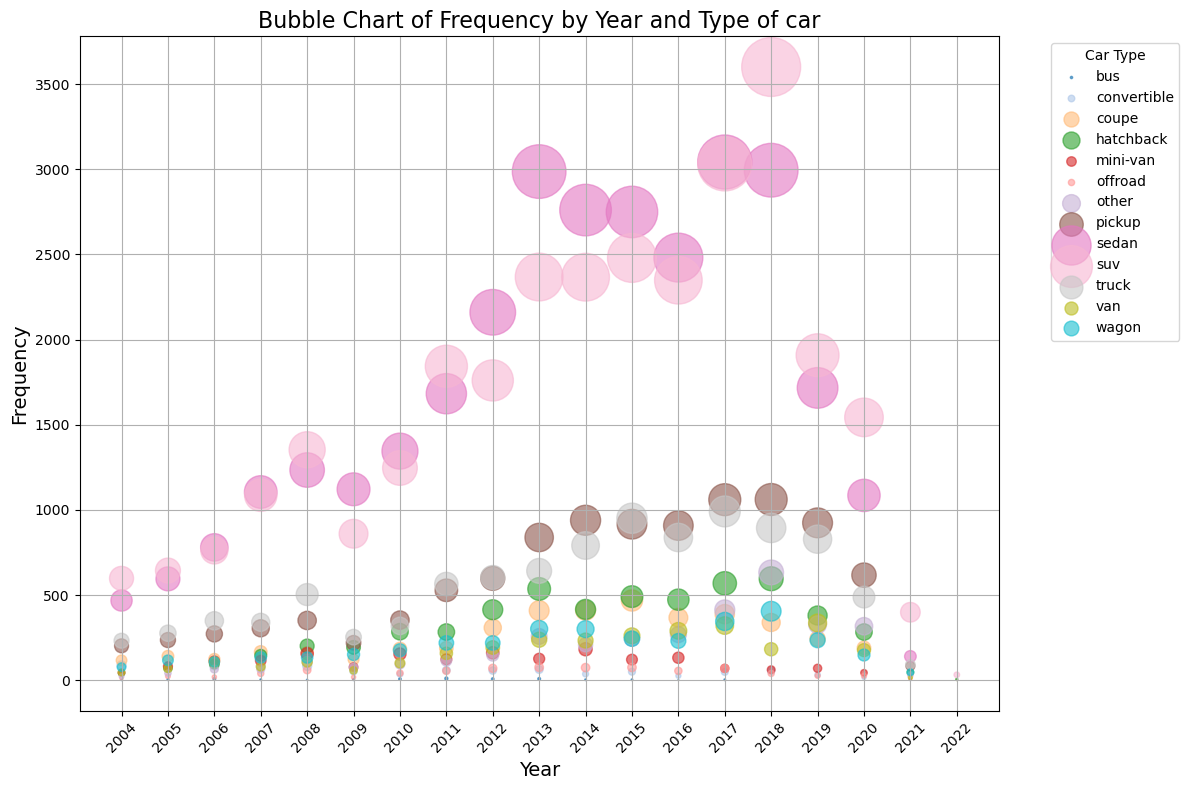

In [115]:
# Map car types to unique colors
unique_types = pivot_df['type'].unique()
color_map = {car_type: plt.cm.tab20(i / len(unique_types)) for i, car_type in enumerate(unique_types)}
pivot_df['color'] = pivot_df['type'].map(color_map)

# Plot the bubble chart
plt.figure(figsize=(12, 8))

# Plot each type as a set of bubbles
for car_type in unique_types:
    subset = pivot_df[pivot_df['type'] == car_type]
    plt.scatter(
        subset['year'], 
        subset['Frequency'], 
        s=subset['Frequency'] / 2,  # Scale bubble size
        label=car_type, 
        alpha=0.6,
        color=color_map[car_type]
    )

# Customize the plot
plt.title("Bubble Chart of Frequency by Year and Type of car", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(pivot_df['year'].unique(), rotation=45)  # Ensure clean year labels
plt.legend(title="Car Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


Question 2

Visualization that does not follow the best principles
The differences are:
    -Frequency starting at 300;
    -No colors are used to distinguish the types of cars. Each line, representing a car type, is labeled at its starting point;
    -Remove years from the axis, only start year and end year;
    -No title of the Y axis;

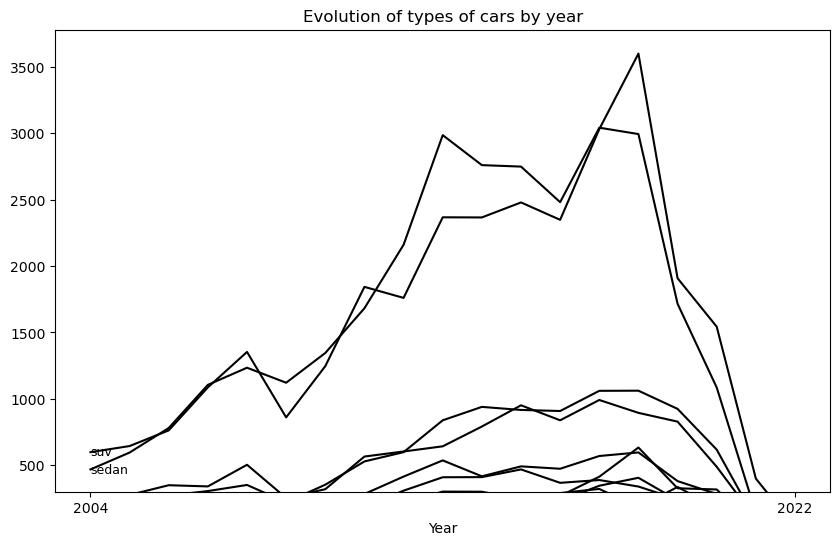

In [116]:
plt.figure(figsize=(10, 6))

# Plot data with all lines in the same color (default)
for vehicle_type, group in pivot_df.groupby('type'):
    # Plot the line
    plt.plot(group['year'], group['Frequency'], color='black')  # Use a single color
    
    # Add the name of the car type near the starting point of the line, inside the axis
    plt.text(
        group['year'].iloc[0],  # Start year (no offset)
        group['Frequency'].iloc[0],  # Align with the first frequency value
        vehicle_type, 
        fontsize=9,
        verticalalignment='center',
        horizontalalignment='left',  # Keep label inside the axis
        clip_on=True  # Ensures text stays inside the plot
    )

# Customize x-axis and y-axis
plt.xlabel('Year')
plt.xticks([2004, 2022])  # Display only start and end years
plt.ylim(300, None)  # Start y-axis at 500

# Add title
plt.title('Evolution of types of cars by year')

# Display the plot
plt.show()


Visualization that follows the best principles

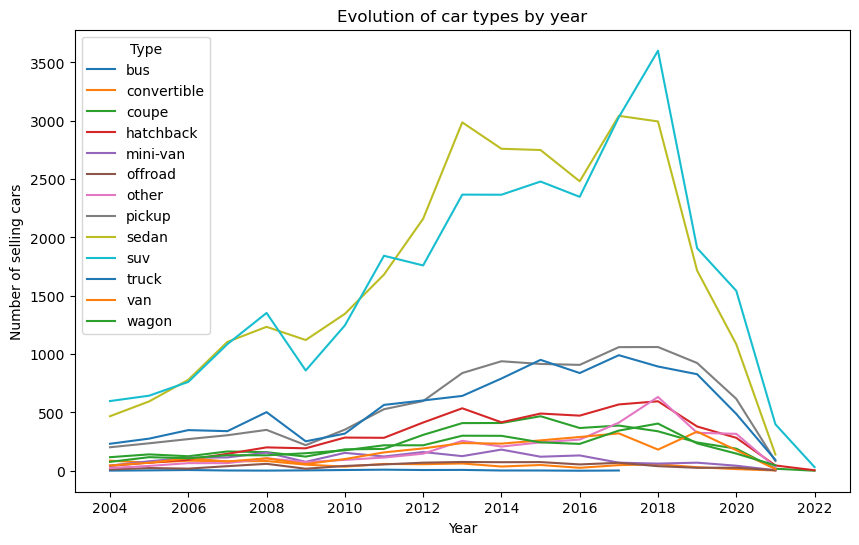

In [117]:
plt.figure(figsize=(10,6))
for vehicle_type, group in pivot_df.groupby('type'):
    plt.plot(group['year'], group['Frequency'], label=vehicle_type)
plt.xlabel('Year')
plt.ylabel('Number of selling cars')
plt.xticks(range(2004, 2024, 2))
plt.title('Evolution of car types by year')
plt.legend(title='Type')
plt.show()